## Titanic Data Set

In [316]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Exploratory Data Analysis

In [317]:
# create the train data set
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


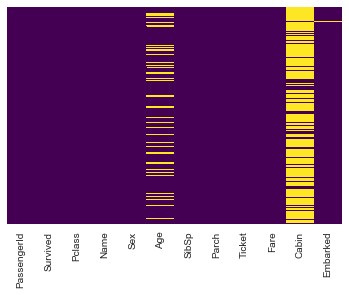

In [318]:
# check for null values in the data frame
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can conclude that the Age & Cabin variable are the only ones registering null values.

Age: we can try to impute the missing data with the existing data

Cabin: We may decide to drop this column since there's no much information we can extract from it. 

In [319]:
# changing the style of seaborn
sns.set_style('whitegrid')

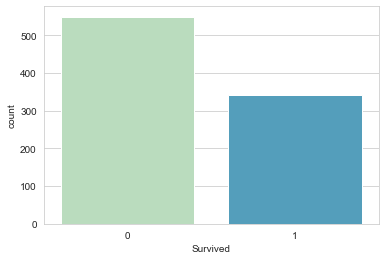

In [320]:
# understand the proportion of people that survived vs the ones that survived
sns.countplot(x = 'Survived', data = train, palette='GnBu')

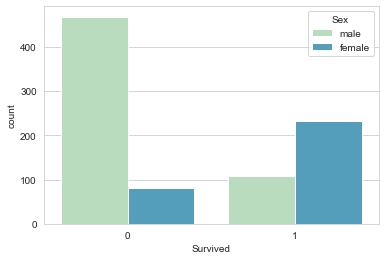

In [321]:
# understand the proportion of survival vs sex
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='GnBu')

We can conclude that women on board had more chances to survive - maybe because they were giving priority to them. 

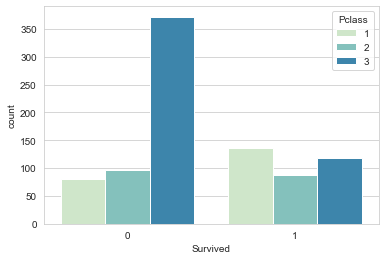

In [322]:
# understand the proportion of survival vs the ship class
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette='GnBu')

We can conclude that people from chepear classes (if the class follows an hierarchy from 1 to 3) were more likely to die.

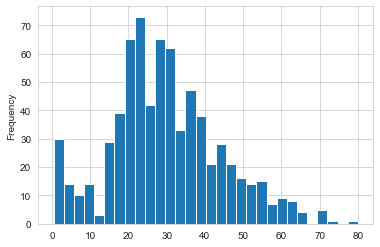

In [323]:
# understand the age distribution on the Titanic
train['Age'].dropna().plot.hist(bins=30)

We can understand that the majority of the people on board on the Titanic had less than 40 years old. We can also conclude that there were some children on board.

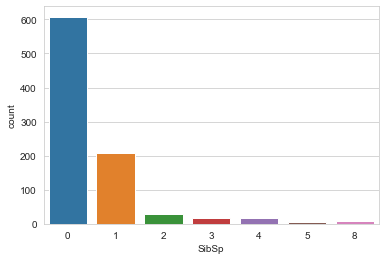

In [324]:
 # understand how many siblings/spouses people had on board
sns.countplot(x = 'SibSp', data = train)

Most of the people didn't have either siblings or spouses on board - we can hypothesize that the majority of the people on board were single.

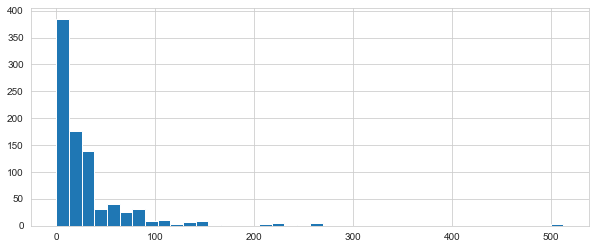

In [325]:
# understand how much the people paid
train['Fare'].hist(bins = 40, figsize = (10,4))

In [326]:
# importing cufflinks to create an interactive histogram
import cufflinks as cf
cf.go_offline()

In [327]:
train['Fare'].iplot(kind='hist', bins = 30)

## 2. Data Preprocessing

#### How to deal with missing data on the Age column?

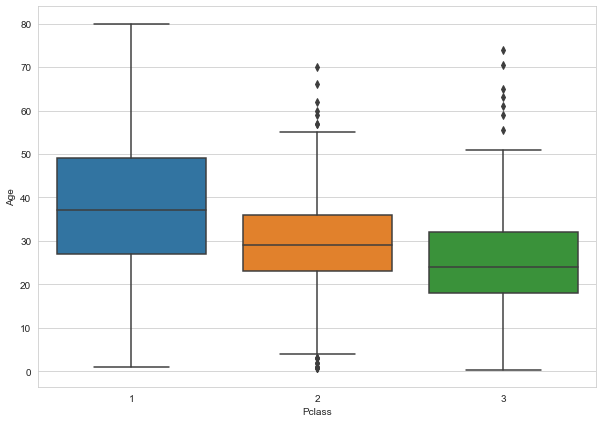

In [328]:
# understand the distribution of Age by Class
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

As we can understand, people on 1st class tend to be older - maybe because they have more wealth to afford it.

Since there is evidence that the average age varies from class to class, let's compute the age mean by class and assign to the missing values

In [329]:
# creating a function to calculate the average age given the class of the person
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [330]:
# imputing the values from the above defined function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

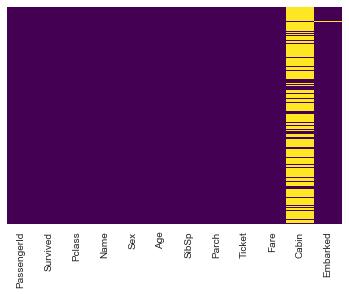

In [331]:
# check that we don't have any missing values for Age variable
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Dropping Cabin column

In [332]:
# dropping the cabin column
train.drop('Cabin', axis = 1, inplace= True)

In [333]:
# Dropping rows that have any missing column
train.dropna(inplace=True)

### 3. Categorical variables to dummy

In [334]:
# transform Sex column into a dummy variables -- Male (1/0)
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [335]:
# transform Embarked column into a dummy variables -- Q & S (1/0)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked.rename(columns={'Q': 'Queenstown', 'S': 'Southampton'}, inplace=True)

In [336]:
# transform Pclass column into a dummy
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [337]:
# renaming the columns Class
pclass.rename(columns= {2: '2nd class', 3:'3rd Class'}, inplace=True)

In [338]:
# concatenating this new columns into our data frame
train = pd.concat([train, sex, embarked, pclass], axis = 1)

In [339]:
# dropping columns Sex & Embarked since we don't need them anymore
train.drop(labels=['Sex', 'Embarked'], axis = 1, inplace = True)

### 4. Feature Engineering

In [340]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Queenstown,Southampton,2nd class,3rd Class
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1


####  Family Size (SibSp + Parch + 1)

In [341]:
# creating a family size variable
train['Family Size'] = train['SibSp'] + train['Parch'] + 1

Text(0.5, 1.0, 'Family Size Count Plot')

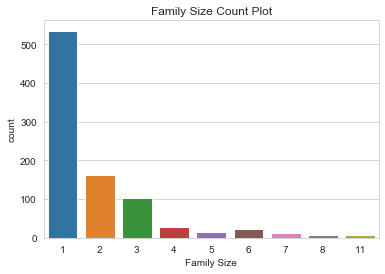

In [342]:
# understanding how the family size is distributed
sns.countplot(train['Family Size'])
plt.title('Family Size Count Plot')

#### Is Married? Extracted from the title (Mrs./Mr.)

In [343]:
# creating a title variable
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [344]:
# creating the is married variables based on the title
train['Is_Married'] = 0
train['Is_Married'].loc[train['Title'] == 'Mrs'] = 1

In [345]:
# visualize our data set
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Queenstown,Southampton,2nd class,3rd Class,Family Size,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0,2,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0,2,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1,1,Mr,0


In [346]:
# drop the unnecessary columns
train.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Title', 'PassengerId'], axis = 1, inplace = True)

In [347]:
train.head()

,Survived,Pclass,Age,Fare,male,Queenstown,Southampton,2nd class,3rd Class,Family Size,Is_Married
0,0,3,22.0,7.2500,1,0,1,0,1,2,0
1,1,1,38.0,71.2833,0,0,0,0,0,2,1
2,1,3,26.0,7.9250,0,0,1,0,1,1,0
3,1,1,35.0,53.1000,0,0,1,0,0,2,1
4,0,3,35.0,8.0500,1,0,1,0,1,1,0


### 5. Modelling

In [348]:
# importing train test split
from sklearn.model_selection import train_test_split

In [349]:
# creating my x data set (without the target variable "Survived")
x = train.drop('Survived', axis = 1)

In [350]:
# creating my y data set with the "Survived" variable
y = train['Survived']

In [351]:
# create our train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3, random_state = 101)

In [352]:
# import Logistic Regression method from SkLearn
from sklearn.linear_model import LogisticRegression

In [353]:
# instanciating our model
log_model = LogisticRegression()

In [354]:
# trainning our model
log_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
# time for predictions
predictions = log_model.predict(x_test)

In [358]:
# import classification report
from sklearn.metrics import classification_report

In [360]:
# printing our metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       384
           1       0.76      0.69      0.72       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623



In [361]:
# importing cofusion matrix
from sklearn.metrics import confusion_matrix

In [364]:
# printing the confusion letter
confusion_matrix(y_test, predictions)

Confusion Matrix:  [[333  51]
 [ 75 164]]
